# Speech Phoneme Analysis and Classification Code

In [31]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
METRICS = ['euclidean', 'manhattan', 'cosine']


def load_data(gender: str = "all"):
    formant_labels = ['Formant 1', 'Formant 2', 'Formant 3']
    data = pd.read_csv('data.csv').dropna(subset=formant_labels)
    if gender in ["F", "M"]:
        data = data[data['Gender'] == gender]
    X = data[formant_labels].values
    y = data['Vowel Phoneme'].values
    return X, y


def transform_matrix_string(matrix: str | np.ndarray, table_format: bool = False):
    formatted_rows = []

    if isinstance(matrix, str):
        rows = matrix.strip().split('\n')
        for row in rows:
            clean_row = row.strip().replace('[', '').replace(']', '')
            elements = clean_row.split()
            formatted_row = ' & '.join(elements)
            formatted_rows.append(formatted_row)
    elif isinstance(matrix, np.ndarray):
        for row in matrix:
            formatted_row = ' & '.join(map(str, row))
            formatted_rows.append(formatted_row)
    else:
        raise ValueError("Matrix must be a string or a numpy array")

    if table_format:
        latex_matrix = ' \\\\ '.join(formatted_rows)
        latex_string = (
            "\\("
            "    \\begin{bmatrix}"
            f"        {latex_matrix}"
            "    \\end{bmatrix}"
            "\\)"
        )
    else:
        latex_matrix = ' \\\\\n'.join(formatted_rows)

        latex_string = (
            "\\(\n"
            "    \\begin{bmatrix}\n"
            f"        {latex_matrix}\n"
            "    \\end{bmatrix}\n"
            "\\)"
        )

    return latex_string


def plot_confusion_matrix(conf_matrix, labels, save_conf_matrix=False, save_path=None):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    if save_conf_matrix:
        plt.savefig(save_path)
    plt.show()


In [34]:
def train_evaluate_knn(X, y, k: int = 5, test_size: float = 0.25, random_state: int = None, metric: str = 'euclidean'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')

    return conf_matrix, f1

In [35]:

def print_multiple_knn_results(n_runs: int = 7, n_k: int = 7, metrics: list[str] = METRICS):
    X, y = load_data()

    for metric in metrics:
        print(f"### {metric.capitalize()} Distance", end="")
        print("\n")

        print("| K |", end="")
        for i in range(1, n_runs + 1):
            print(f" F1 score \\ Run {i} |", end="")
        print(" F1 Score Average |")
        print("|---|" + "---|" * n_runs + "---|")

        for k in range(2, n_k+1):  # You can adjust the range of K values as needed
            print(f"| {k} |", end="")
            f1_scores = []
            for i in range(1, n_runs + 1):
                _, f1 = train_evaluate_knn(X, y, k=k, random_state=i, metric=metric)
                f1_scores.append(f1)
                print(f" {f1:.5f} |", end="")
            average_f1_score = np.mean(f1_scores)
            print(f" {average_f1_score:.5f} |", end="")
            print("\n", end="")

print_multiple_knn_results(n_runs=7, n_k=7)

### Euclidean Distance

| K | F1 score \ Run 1 | F1 score \ Run 2 | F1 score \ Run 3 | F1 score \ Run 4 | F1 score \ Run 5 | F1 score \ Run 6 | F1 score \ Run 7 | F1 Score Average |
|---|---|---|---|---|---|---|---|---|
| 2 | 0.86842 | 0.86842 | 0.84211 | 0.78947 | 0.86842 | 0.81579 | 0.92105 | 0.85338 |
| 3 | 0.92105 | 0.97368 | 0.89474 | 0.84211 | 0.92105 | 0.94737 | 1.00000 | 0.92857 |
| 4 | 0.89474 | 0.94737 | 0.86842 | 0.86842 | 0.89474 | 0.92105 | 1.00000 | 0.91353 |
| 5 | 0.86842 | 0.94737 | 0.94737 | 0.89474 | 0.92105 | 0.92105 | 1.00000 | 0.92857 |
| 6 | 0.84211 | 0.97368 | 0.89474 | 0.86842 | 0.89474 | 0.92105 | 1.00000 | 0.91353 |
| 7 | 0.81579 | 0.97368 | 0.94737 | 0.86842 | 0.89474 | 0.89474 | 0.97368 | 0.90977 |
### Manhattan Distance

| K | F1 score \ Run 1 | F1 score \ Run 2 | F1 score \ Run 3 | F1 score \ Run 4 | F1 score \ Run 5 | F1 score \ Run 6 | F1 score \ Run 7 | F1 Score Average |
|---|---|---|---|---|---|---|---|---|
| 2 | 0.86842 | 0.86842 | 0.84211 | 0.78947 

In [36]:
def print_knn_gender_results(n_runs: int = 7, k: int = 5, metrics: list[str] = METRICS):
    for metric in metrics:
        print(f"### {metric.capitalize()} Distance", end="")
        print("\n")

        print("| Gender |", end="")
        for i in range(1, n_runs + 1):
            print(f" F1 score \\ Run {i} |", end="")
        print(" F1 Score Average |")
        print("|---|" + "---|" * n_runs + "---|")

        for gender in ["F", "M", "all"]:
            print(f"| {gender} |", end="")
            X, y = load_data(gender=gender)
            f1_scores = []
            for i in range(1, n_runs + 1):
                _, f1 = train_evaluate_knn(X, y, k=k, random_state=i, metric=metric)
                f1_scores.append(f1)
                print(f" {f1:.5f} |", end="")
            average_f1_score = np.mean(f1_scores)
            print(f" {average_f1_score:.5f} |")
        print("\n")

print_knn_gender_results(n_runs=7, k=5)

### Euclidean Distance

| Gender | F1 score \ Run 1 | F1 score \ Run 2 | F1 score \ Run 3 | F1 score \ Run 4 | F1 score \ Run 5 | F1 score \ Run 6 | F1 score \ Run 7 | F1 Score Average |
|---|---|---|---|---|---|---|---|---|
| F | 0.94737 | 0.94737 | 0.94737 | 1.00000 | 1.00000 | 1.00000 | 1.00000 | 0.97744 |
| M | 0.89474 | 0.89474 | 0.89474 | 0.84211 | 0.89474 | 0.68421 | 0.78947 | 0.84211 |
| all | 0.86842 | 0.94737 | 0.94737 | 0.89474 | 0.92105 | 0.92105 | 1.00000 | 0.92857 |


### Manhattan Distance

| Gender | F1 score \ Run 1 | F1 score \ Run 2 | F1 score \ Run 3 | F1 score \ Run 4 | F1 score \ Run 5 | F1 score \ Run 6 | F1 score \ Run 7 | F1 Score Average |
|---|---|---|---|---|---|---|---|---|
| F | 0.94737 | 0.94737 | 0.94737 | 1.00000 | 1.00000 | 1.00000 | 1.00000 | 0.97744 |
| M | 0.89474 | 0.94737 | 0.84211 | 0.89474 | 0.89474 | 0.73684 | 0.73684 | 0.84962 |
| all | 0.92105 | 0.97368 | 0.89474 | 0.89474 | 0.89474 | 0.86842 | 1.00000 | 0.92105 |


### Cosine Distance

| Gen

### Euclidean Distance

Run 1: 


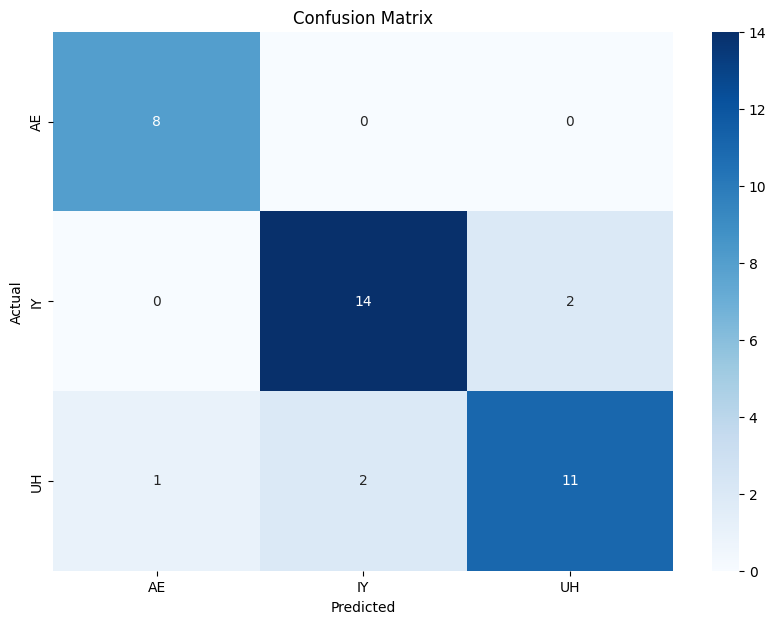

F1 Score : 0.86842


Run 2: 


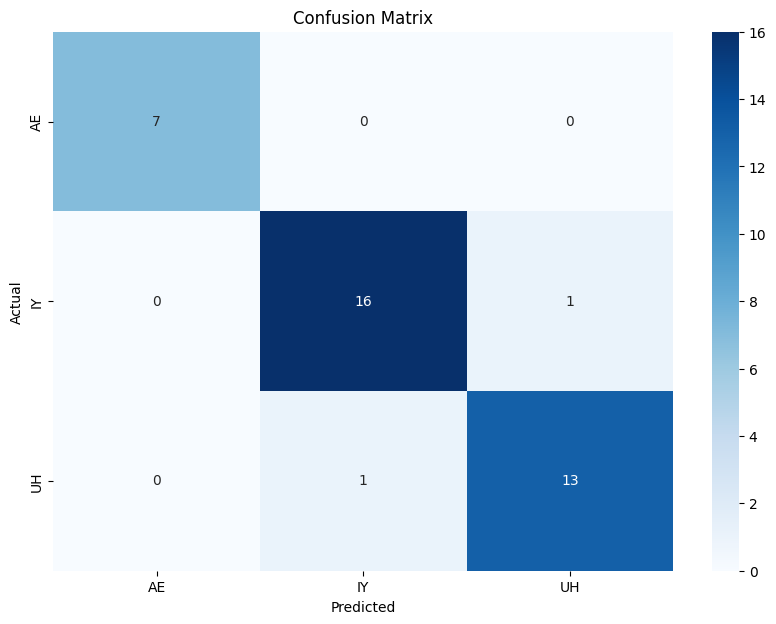

F1 Score : 0.94737


Run 3: 


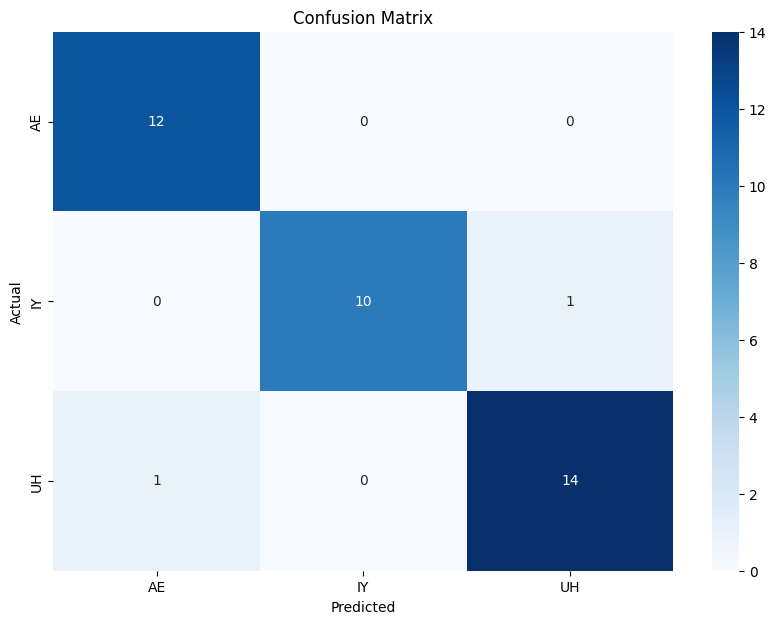

F1 Score : 0.94737


Run 4: 


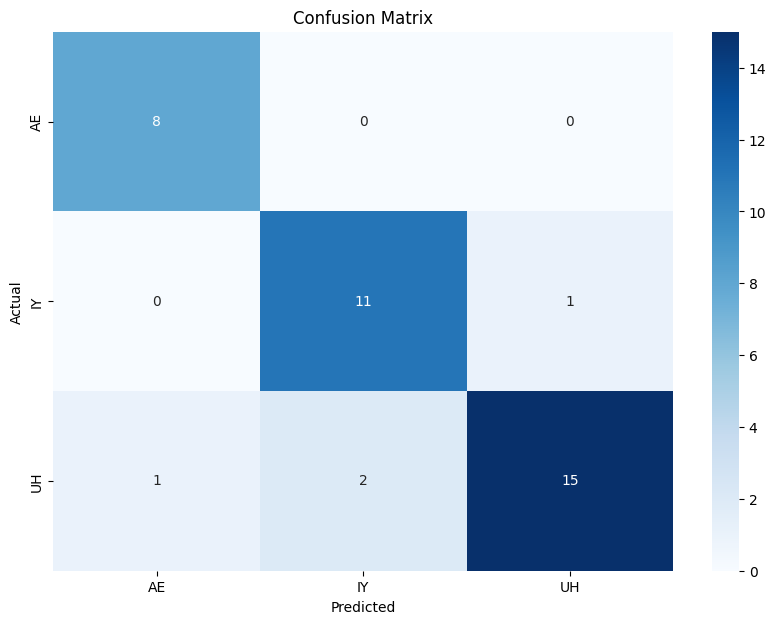

F1 Score : 0.89474


Run 5: 


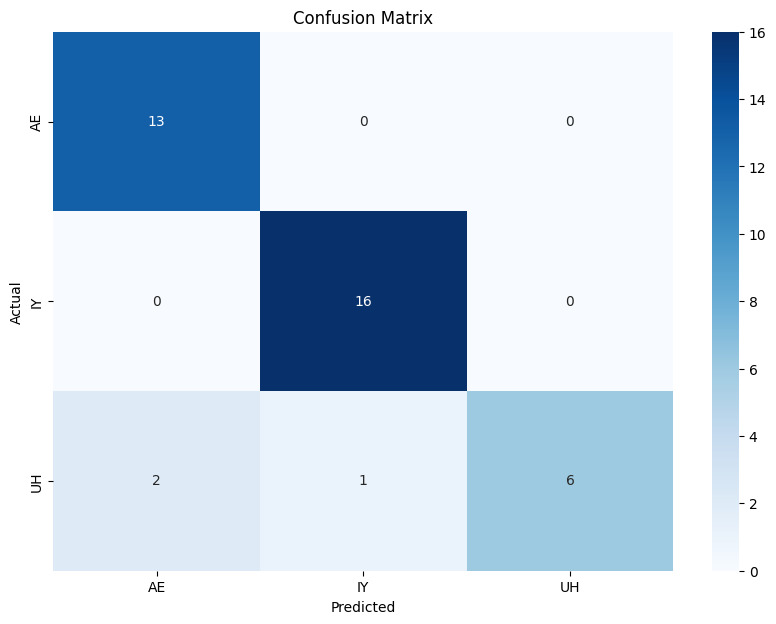

F1 Score : 0.92105


Run 6: 


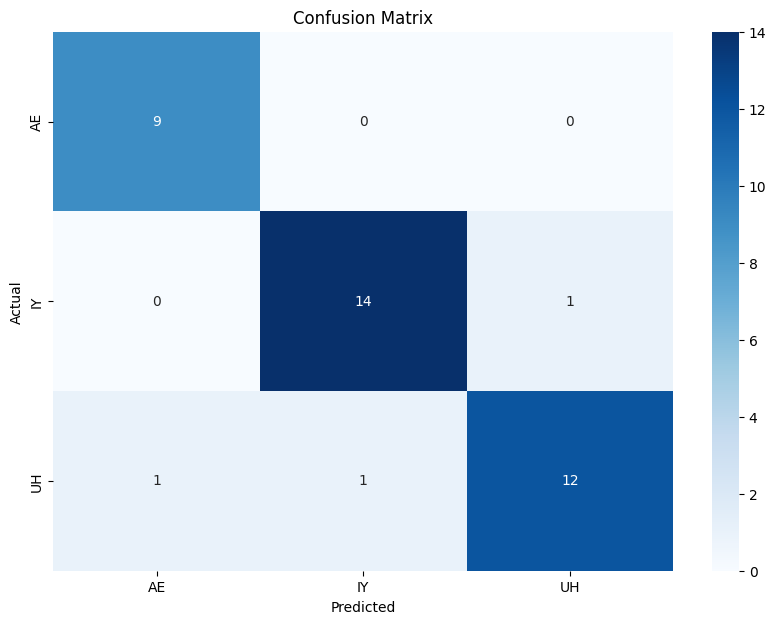

F1 Score : 0.92105


Run 7: 


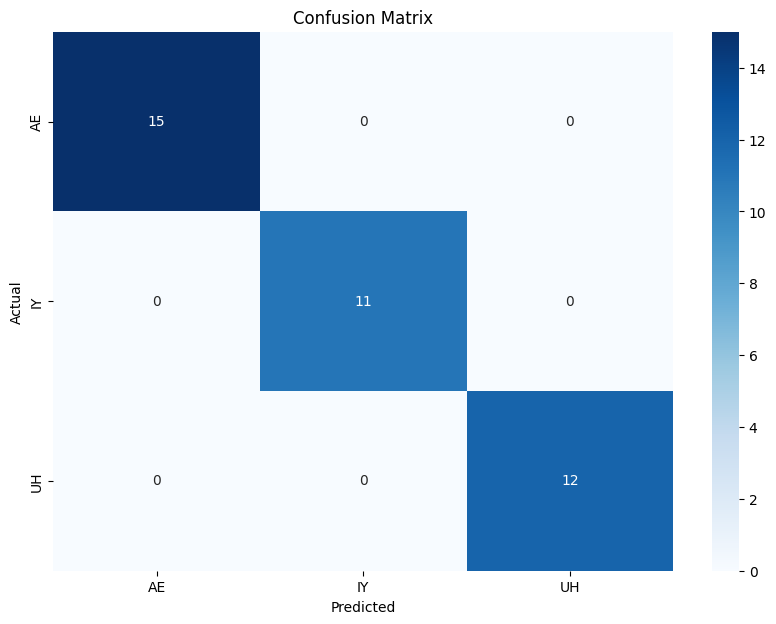

F1 Score : 1.00000


Average F1 score: 0.9285714285714286


### Manhattan Distance

Run 1: 


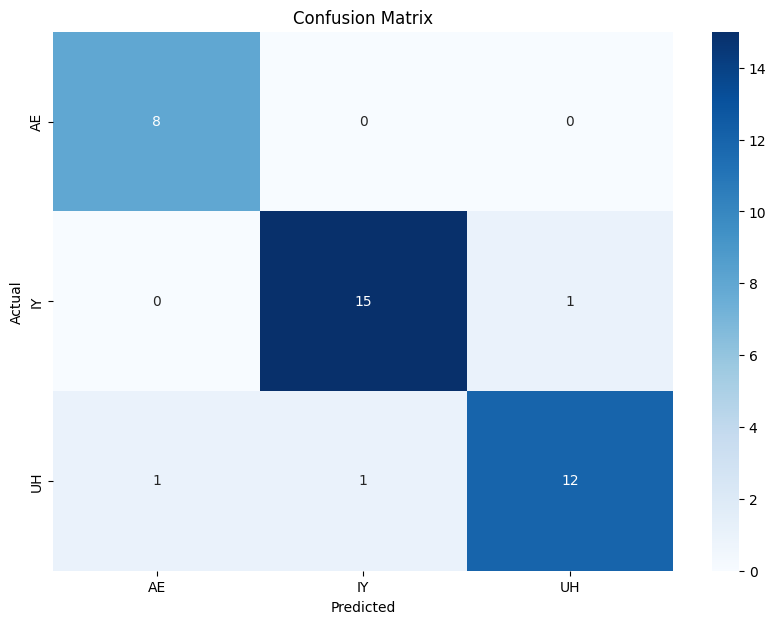

F1 Score : 0.92105


Run 2: 


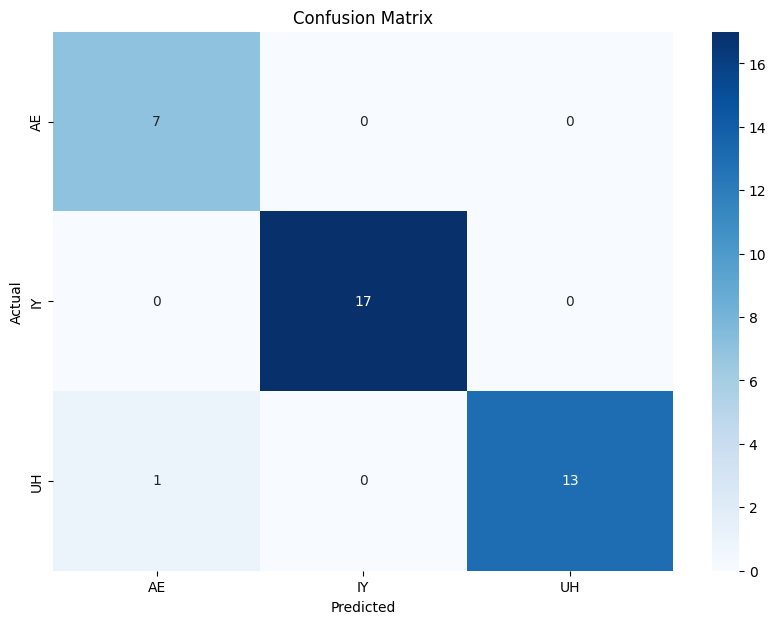

F1 Score : 0.97368


Run 3: 


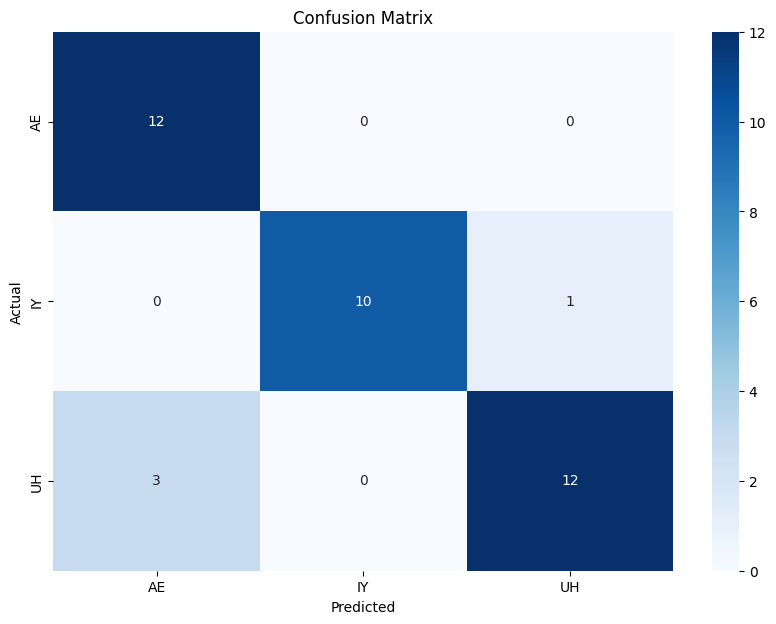

F1 Score : 0.89474


Run 4: 


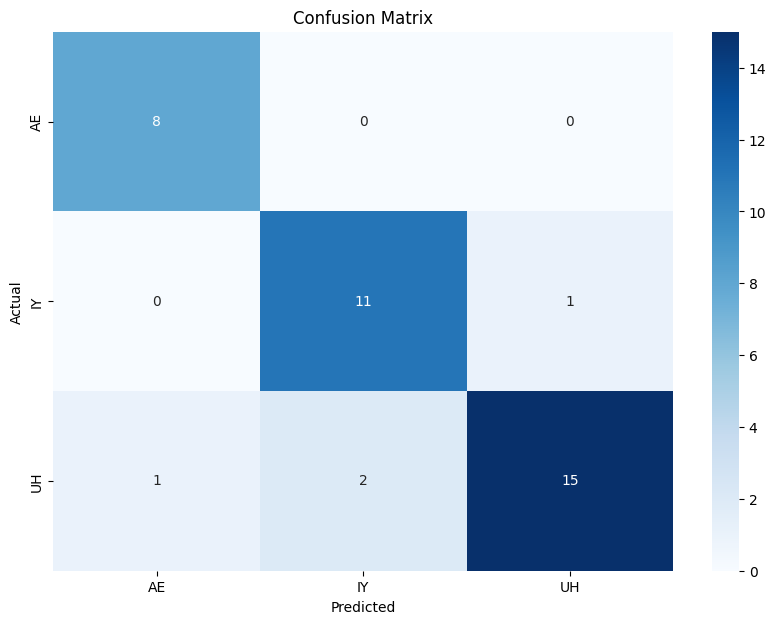

F1 Score : 0.89474


Run 5: 


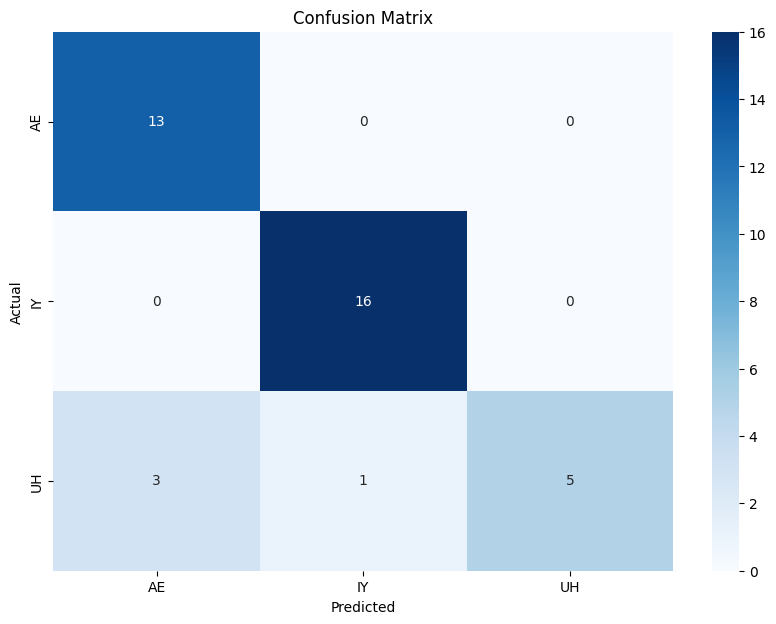

F1 Score : 0.89474


Run 6: 


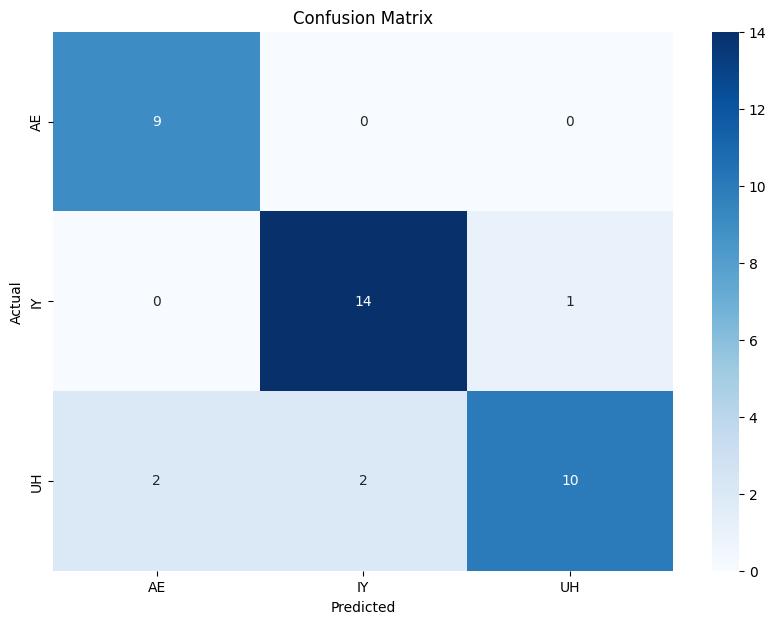

F1 Score : 0.86842


Run 7: 


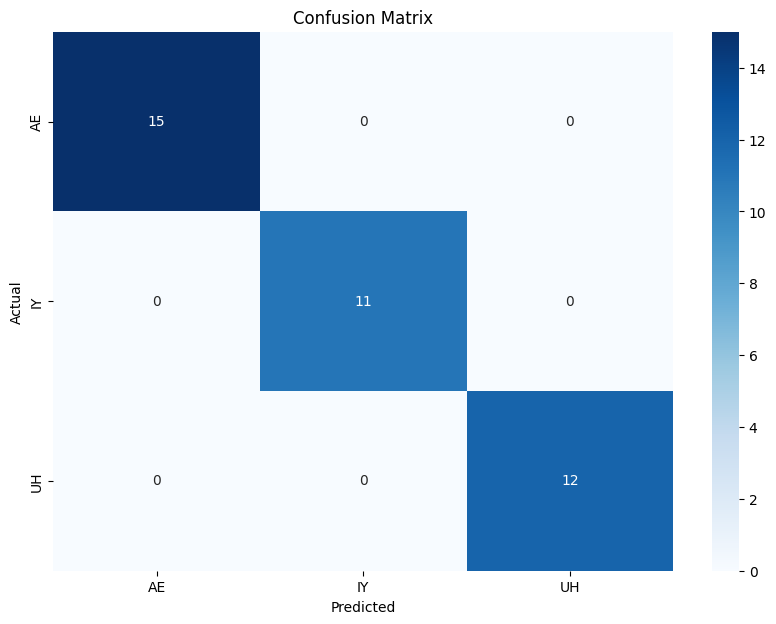

F1 Score : 1.00000


Average F1 score: 0.9210526315789475


### Cosine Distance

Run 1: 


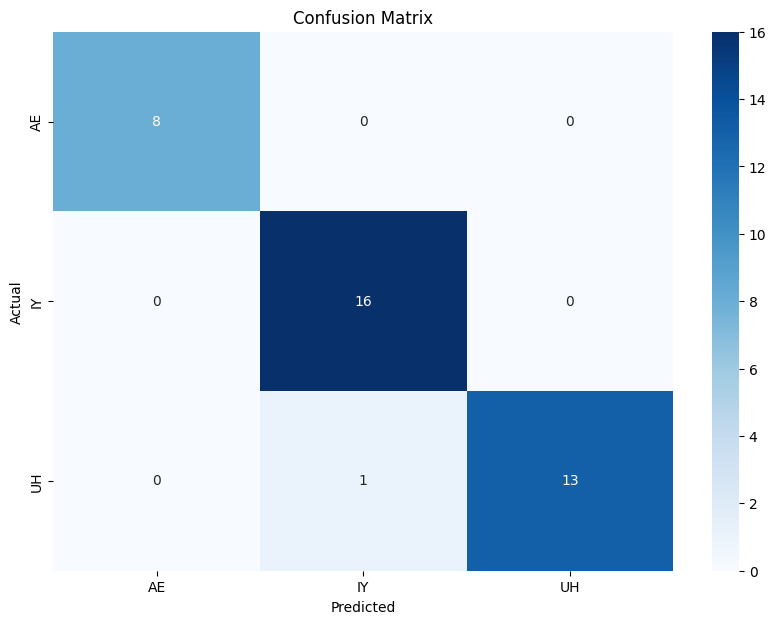

F1 Score : 0.97368


Run 2: 


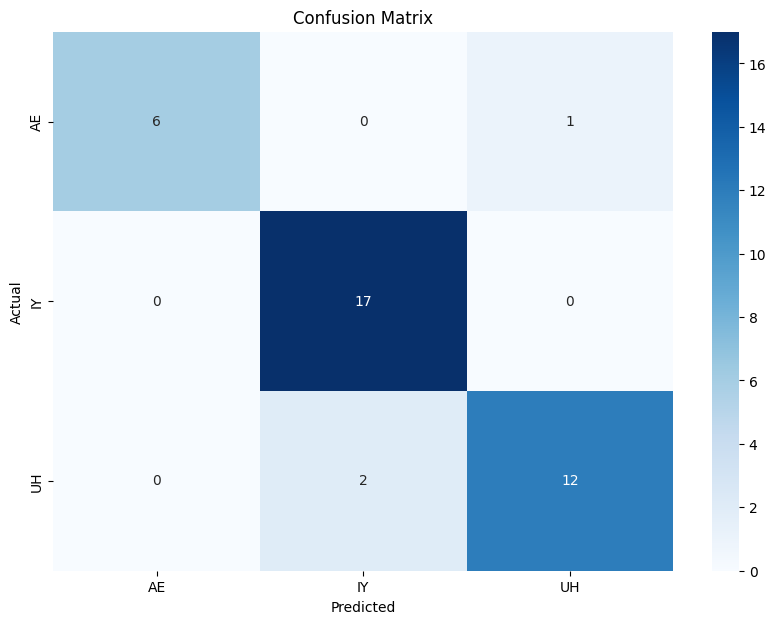

F1 Score : 0.92105


Run 3: 


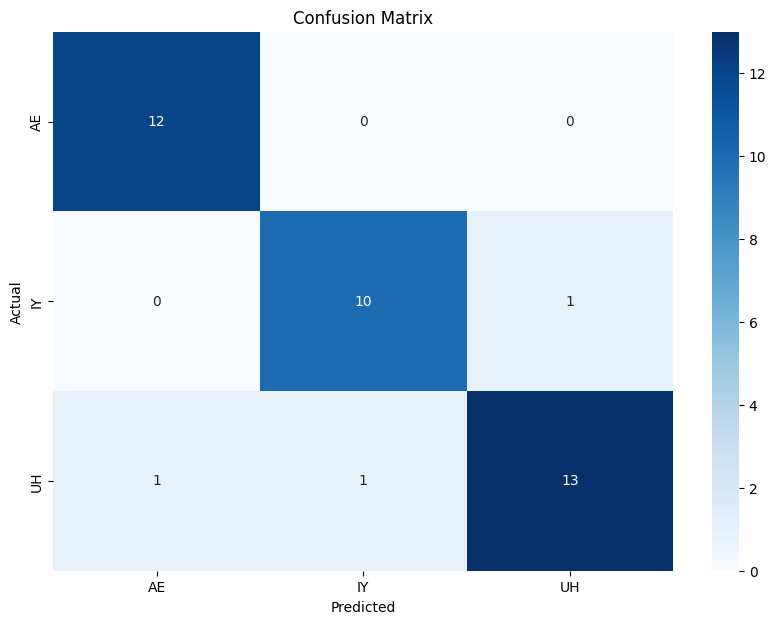

F1 Score : 0.92105


Run 4: 


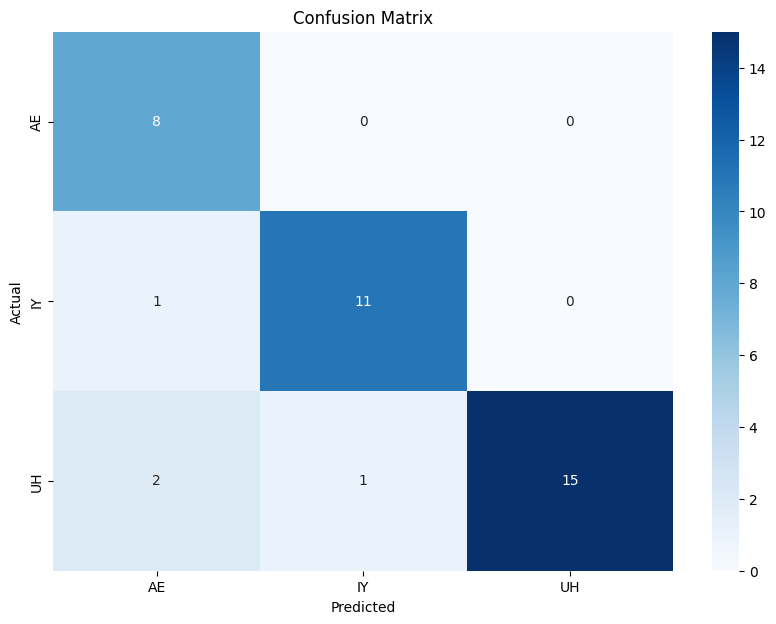

F1 Score : 0.89474


Run 5: 


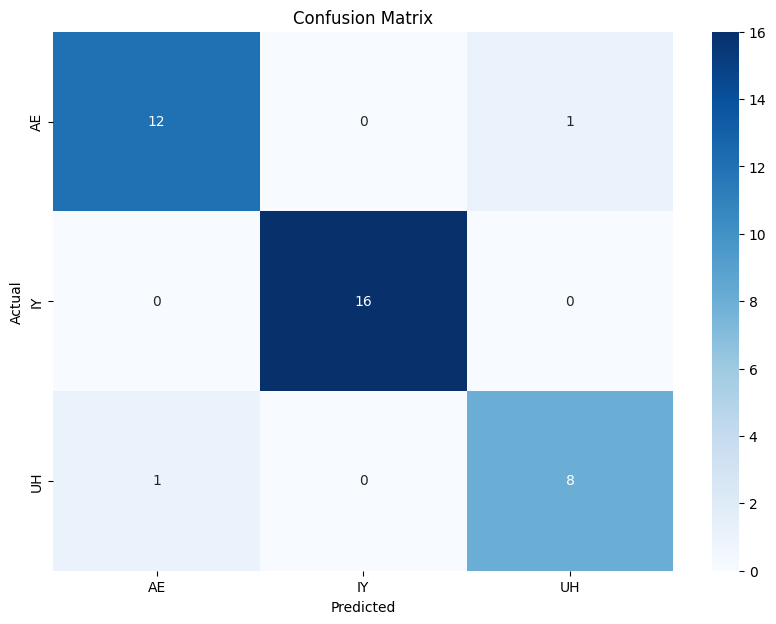

F1 Score : 0.94737


Run 6: 


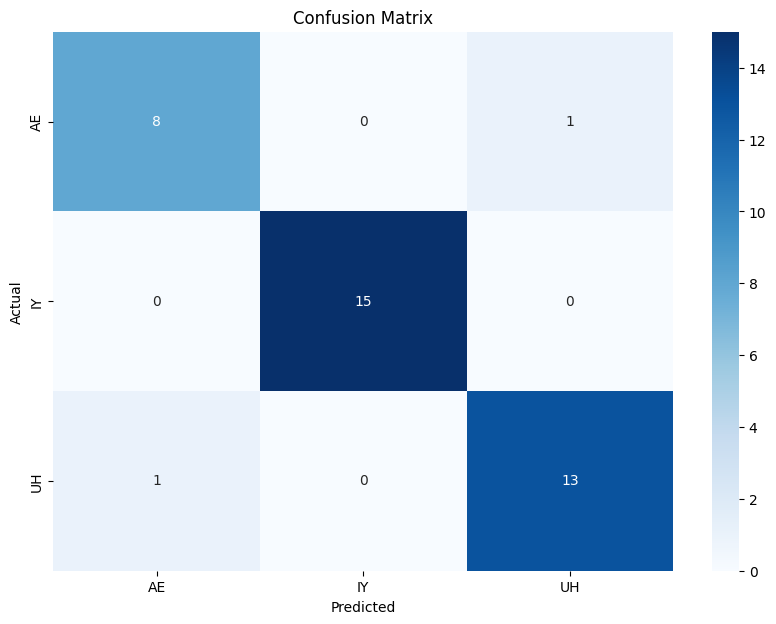

F1 Score : 0.94737


Run 7: 


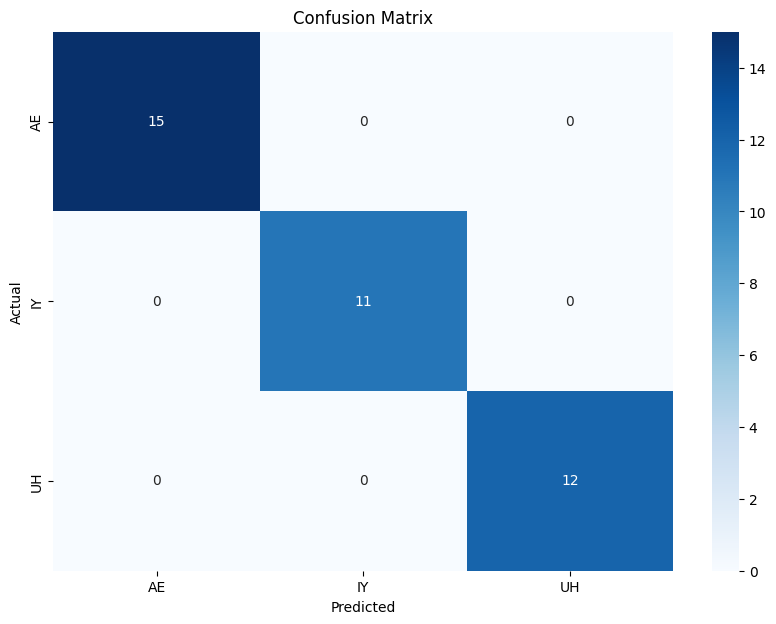

F1 Score : 1.00000


Average F1 score: 0.943609022556391




In [37]:
def print_knn_results(n_runs: int = 7, k: int = 5, metrics: list[str] = METRICS, save_conf_matrix: bool = False):
    X, y = load_data(gender="all")
    labels = np.unique(y)
    for metric in metrics:
        print(f"### {metric.capitalize()} Distance", end="")
        print("\n")

        f1_scores = []
        for i in range(1, n_runs+1):
            print(f"Run {i}: ")
            conf_matrix, f1 = train_evaluate_knn(X, y, k=k, random_state=i, metric=metric)
            f1_scores.append(f1)
            plot_confusion_matrix(conf_matrix, labels, save_conf_matrix, f"conf_metric/conf_matrix_{metric}_{i}.png")
            print(f"F1 Score : {f1:.5f}")
            print("\n")
        print(f"Average F1 score: {np.mean(f1_scores)}")
        print("\n")

print_knn_results(n_runs=7, k=5, save_conf_matrix=False)